In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("homeprices_banglore.csv")
df.head(5)

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


Let's scale first

In [4]:
from sklearn import preprocessing

sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('price', axis='columns'))
scaled_X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [5]:
scaled_y = sy.fit_transform(df.price.values.reshape(df.shape[0],1))
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

Let's implement batch gradient descent

In [9]:
def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
  number_of_features = X.shape[1]
  w = np.ones(shape=(number_of_features))
  b = 0
  total_samples = X.shape[0]
  cost_list = []
  epoch_list = []

  for i in range(epochs):
    y_predicted = np.dot(w,X.T) + b

    w_grad = -(2/total_samples)*(X.T.dot(y_true-y_predicted))
    b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)

    w = w - learning_rate*w_grad
    b = b - learning_rate*b_grad

    cost = np.mean(np.square(y_true - y_predicted))

    if i%10==0:
      cost_list.append(cost)
      epoch_list.append(i)
  return w, b, cost, cost_list, epoch_list

In [10]:
w,b,cost,cost_list,epoch_list = batch_gradient_descent(scaled_X, scaled_y.reshape(scaled_y.shape[0]), 500)
w,b,cost

(array([0.70712464, 0.67456527]),
 np.float64(-0.23034857438407427),
 np.float64(0.0068641890429808105))

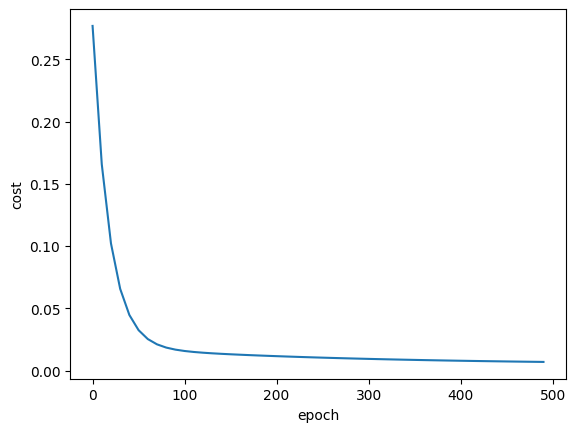

In [11]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list, cost_list)

In [18]:
def predict(area, bedrooms, w, b):
  scaled_X = sx.transform([[area, bedrooms]])[0]
  # The output of np.dot(w,scaled_X.T) + b is a scalar. Reshape it to a 2D array.
  return sy.inverse_transform((np.dot(w,scaled_X.T) + b).reshape(-1, 1))[0][0]

predict(2600,4,w,b)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


np.float64(128.45484403267596)

In [19]:
predict(1000,2,w,b)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


np.float64(30.253094462442355)

Now, time for stochastic gradient descent

In [20]:
import random


In [21]:
def stochastic_gradient_descent(X, y_true, epochs, learning_rate=0.01):
    number_of_features = X.shape[1]
    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = X.shape[0]

    cost_list = []
    epoch_list = []

    for i in range(epochs):
      random_index = random.randint(0, total_samples-1)
      sample_x = X[random_index]
      sample_y = y_true[random_index]
      y_predicted = np.dot(w, sample_x.T) + b

      w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
      b_grad = -(2/total_samples)*(sample_y-y_predicted)

      w = w - learning_rate * w_grad
      b = b - learning_rate * b_grad

      cost = np.square(sample_y-y_predicted)

      if i%100==0: # at every 100th iteration record the cost and epoch value
          cost_list.append(cost)
          epoch_list.append(i)
    return w, b, cost, cost_list, epoch_list

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),10000)
w_sgd, b_sgd, cost_sgd


(array([0.70655858, 0.67178378]),
 np.float64(-0.23114884873962122),
 np.float64(0.002442626731159709))

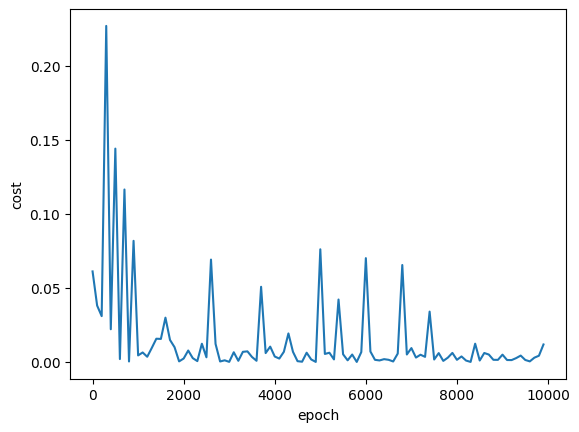

In [23]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd, cost_list_sgd)

In [24]:
def predict_stochastic(area, bedrooms, w_sgd, b_sgd):
  scaled_X = sx.transform([[area, bedrooms]])[0]
  # The output of np.dot(w,scaled_X.T) + b is a scalar. Reshape it to a 2D array.
  return sy.inverse_transform((np.dot(w,scaled_X.T) + b).reshape(-1, 1))[0][0]

predict(2600,4,w_sgd,b_sgd)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


np.float64(128.01774899638917)

In [25]:
predict(1000,2,w_sgd,b_sgd)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


np.float64(30.045911976929887)

Exercise:
Implement mini batch gradient descent in python and plot cost vs epoch graph. Mini batch is intermediate version of batch GD and stochastic GD. In stochastic we used one randomly picked training sample, In mini gradient descent you will use a batch of samples in each iterations. For example if you have total 50 training samples, you can take a batch of 10 samples, calculate cumulitive error for those 10 samples and then adjust weights. In SGD we adjust weights after every one sample. In Batch we adjust weights after going through all samples but in mini batch we do after every m samples (where m is batch size and it is 0 < m < n, where n is total number of samples

In [32]:
def mini_batch_gd(X, y_true, epochs, learning_rate=0.01, batch_size=10):
    number_of_features = X.shape[1]
    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = X.shape[0]

    cost_list = []
    epoch_list = []

    if total_samples < batch_size:
        raise ValueError("batch_size cannot be greater than total_samples")

    for epoch in range(epochs):
        # Randomly select 'batch_size' indices for the mini-batch
        random_indices = random.sample(range(total_samples), batch_size)

        sample_x = X[random_indices] # This will be a numpy array
        sample_y = y_true[random_indices] # This will be a numpy array

        y_predicted = np.dot(w, sample_x.T) + b

        # Gradients are calculated over the batch and scaled by batch_size
        w_grad = -(2/batch_size)*(sample_x.T.dot(sample_y - y_predicted))
        b_grad = -(2/batch_size)*np.sum(sample_y - y_predicted)

        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad

        # Calculate mean squared error for the current batch
        cost = np.mean(np.square(sample_y - y_predicted))

        if epoch % 100 == 0: # at every 100th iteration record the cost and epoch value
            cost_list.append(cost)
            epoch_list.append(epoch)

    return w, b, cost, cost_list, epoch_list

w_mb, b_mb, cost_mb, cost_list_mb, epoch_list_mb = mini_batch_gd(scaled_X, scaled_y.reshape(scaled_y.shape[0],), 10000, batch_size=10)
print(f"w_mb: {w_mb}, b_mb: {b_mb}, cost_mb: {cost_mb}")

w_mb: [0.84329735 0.30569027], b_mb: -0.09527516364353313, cost_mb: 0.00230773799773364


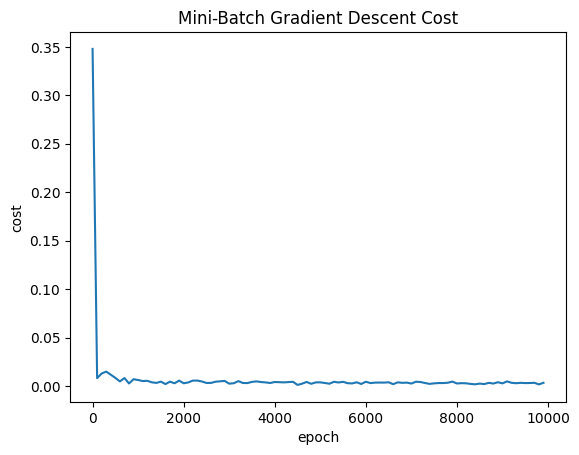

In [33]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.title("Mini-Batch Gradient Descent Cost")
plt.plot(epoch_list_mb, cost_list_mb)